$6x_1 + 9x_2 → max$

$
\left\{ \begin{array} \\
 8x_1 + 7x_2 \leq 112 \\
 -3x_1 + 7x_2 \leq 84 \\
 x_1, x_2 \geq 0
\end{array}\right.
$

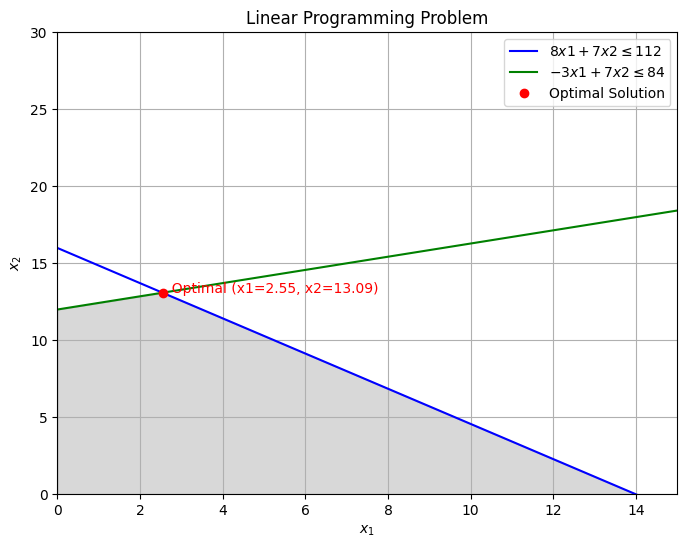

Optimal solution found:
x1 = 2.55
x2 = 13.09
Optimal value = 133.09


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Define the coefficients of the objective function
c = [-6, -9]

# Coefficients of the inequality constraints
A = [
    [8, 7],   # 8x1 + 7x2 <= 112
    [-3, 7]   # -3x1 + 7x2 <= 84
]

# Right-hand side of the inequalities
b = [112, 84]

# Bounds for the variables
x1_bounds = (0, None)
x2_bounds = (0, None)

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=[x1_bounds, x2_bounds], method='highs')

# Plot the constraints and feasible region
x = np.linspace(0, 15, 400)

# First constraint line: 8x1 + 7x2 <= 112
y1 = (112 - 8 * x) / 7

# Second constraint line: -3x1 + 7x2 <= 84
y2 = (84 + 3 * x) / 7

# Feasible region
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label=r'$ 8x1 + 7x2 \leq 112$', color='blue')
plt.plot(x, y2, label=r'$-3x1 + 7x2 \leq 84$', color='green')

# Shade the feasible region
plt.fill_between(x, np.minimum(y1, y2), 0, where=(y1 >= 0) & (y2 >= 0), color='gray', alpha=0.3)

# Plot the optimal solution
if result.success:
    plt.plot(result.x[0], result.x[1], 'ro', label='Optimal Solution')
    plt.text(result.x[0], result.x[1], f'  Optimal (x1={result.x[0]:.2f}, x2={result.x[1]:.2f})', color='red')

# Labels and legend
plt.xlim((0, 15))
plt.ylim((0, 30))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Linear Programming Problem')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Display the result
if result.success:
    print("Optimal solution found:")
    print(f"x1 = {result.x[0]:.2f}")
    print(f"x2 = {result.x[1]:.2f}")
    print(f"Optimal value = {-result.fun:.2f}")  # Negate the result.fun to get the maximum value
else:
    print("No solution found.")